In [1]:
%matplotlib inline
import numpy
import sympy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 51
dx = 1/(nx-1)
nt = 1000
dt = 0.01
u = 0.1     # assume constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient
L = 1.0
x = numpy.linspace(0,1,nx)

In [3]:
C = x/L

(0, 1)

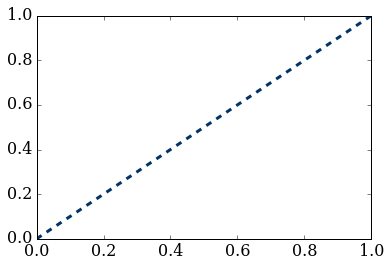

In [4]:
pyplot.plot(x, C, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1)

In [5]:
for n in range(nt):
    
    Cn = C.copy()
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])

(0, 1)

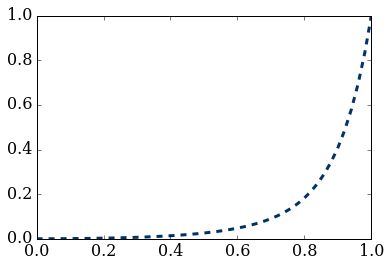

In [6]:
pyplot.plot(x, C, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1)

In [7]:
from matplotlib import animation
from IPython.display import HTML

In [8]:
nt = 1000
C = x/L

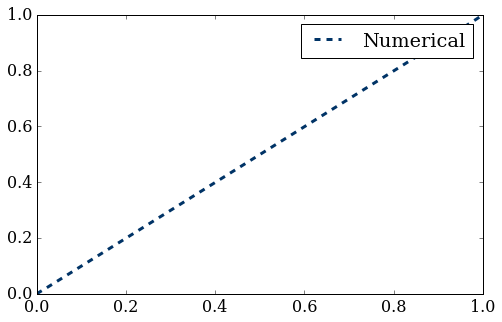

In [9]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,1), ylim=(0,1))
line = ax.plot([], [], color='#003366', ls='--', lw =3)[0]
ax.legend(['Numerical'])

def AD_equation(i):
    
    Cn = C.copy()
    
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])
            
    line.set_data(x,C)

anim = animation.FuncAnimation(fig, AD_equation,
                               frames=nt, interval=10)

In [10]:
HTML(anim.to_html5_video())

In [11]:
%matplotlib inline
import numpy
import sympy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [12]:
x, R, L = sympy.symbols('x R L')

In [13]:
from sympy.utilities.lambdify import lambdify

c = (sympy.exp(R * x / L) - 1) / (sympy.exp(R) - 1)
print(c)

(exp(R*x/L) - 1)/(exp(R) - 1)


In [14]:
c_lamb = lambdify((R, x, L), c)

In [15]:
nx = 51
dx = 1/(nx-1)
nt = 1000
dt = 0.01
u = 0.1     # assume constant speed of u = 0.1 m/s
D = 0.01    # diffusion coefficient
L = 1.0
R = u * L / D
x = numpy.linspace(0,1,nx)

In [16]:
c = numpy.asarray([c_lamb(R, x0, L) for x0 in x])
c

array([  0.00000000e+00,   1.00521260e-05,   2.23298205e-05,
         3.73258304e-05,   5.56419982e-05,   7.80134161e-05,
         1.05337928e-04,   1.38712161e-04,   1.79475543e-04,
         2.29264049e-04,   2.90075868e-04,   3.64351591e-04,
         4.55072164e-04,   5.65878522e-04,   7.01217714e-04,
         8.66521376e-04,   1.06842372e-03,   1.31502781e-03,
         1.61623072e-03,   1.98412079e-03,   2.43346273e-03,
         2.98229021e-03,   3.65262962e-03,   4.47138401e-03,
         5.47141289e-03,   6.69285092e-03,   8.18471870e-03,
         1.00068901e-02,   1.22324953e-02,   1.49508557e-02,
         1.82710685e-02,   2.23263855e-02,   2.72795610e-02,
         3.33293832e-02,   4.07186527e-02,   4.97439268e-02,
         6.07674215e-02,   7.42315484e-02,   9.06766701e-02,
         1.10762787e-01,   1.35296026e-01,   1.65260991e-01,
         2.01860283e-01,   2.46562758e-01,   3.01162485e-01,
         3.67850742e-01,   4.49303963e-01,   5.48791151e-01,
         6.70305078e-01,

In [17]:
from matplotlib import animation
from IPython.display import HTML

In [18]:
C = x/L
C_analytical = x/L
c = numpy.asarray([c_lamb(R, x0, L) for x0 in x])

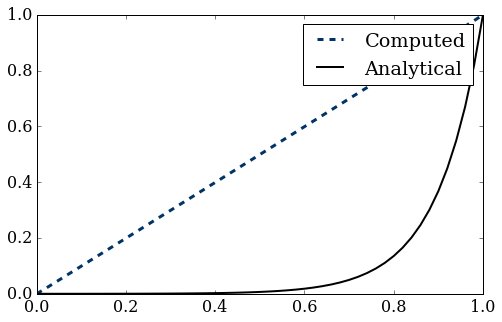

In [19]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,1), ylim=(0,1))
line = ax.plot([], [], color='#003366', ls='--', lw =3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Computed','Analytical'])

def AD_equation(i):
    
    Cn = C.copy()
    
    C[1:-1] = Cn[1:-1] -\
              u * dt / (2 * dx) * (Cn[2:] - Cn[0:-2]) +\
              D * dt / dx**2 * (Cn[2:] - 2 * Cn[1:-1] + Cn[0:-2])
            
    C_analytical = numpy.asarray([c_lamb(R, xi, L) for xi in x])
    line.set_data(x,C)
    line2.set_data(x,C_analytical)
    
anim = animation.FuncAnimation(fig, AD_equation,
                               frames=nt, interval=10)

In [20]:
HTML(anim.to_html5_video())

In [46]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [97]:
def plot_3D(x, y, C):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    C: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,C[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.view_init(30,45)

In [98]:
def AD_equation_2d(C, nt, D, u, v, dt, dx, dy):
    
    for n in range(nt):
        
        Cn = C.copy()
        
        C[1:-1,1:-1] = Cn[1:-1,1:-1] -\
                       u * dt / (2 * dx) * (Cn[1:-1,2:] - Cn[1:-1,:-2]) -\
                       v * dt / (2 * dy) * (Cn[2:,1:-1] - Cn[:-2,1:-1]) +\
                       D * dt / dx**2 * (Cn[1:-1,2:] - 2 * Cn[1:-1,1:-1] + Cn[1:-1,:-2]) +\
                       D * dt / dy**2 * (Cn[2:,1:-1] - 2 * Cn[1:-1,1:-1] + Cn[:-2,1:-1])
                        
        C[-1,:] = C[-2,:]
        C[:,-1] = C[:,-2]
        
    return C

In [99]:
L = 1.0
H = 1.0

nx = 51
ny = 51
nt = 1000

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

D = 0.01
u = 0.1
v = 0.1

dt = 0.01

In [100]:
C = numpy.zeros((ny, nx))

for i in range(ny):
    if 0.5 <= y[i]: 
        C[i,0] = 1
    else: 
        C[i,0] = 0

for i in range(nx):
    if 0.3 <= x[i] and 0.6 >= x[i]: 
        C[0,i] = 0.5
    else:
        C[0,i] = 0

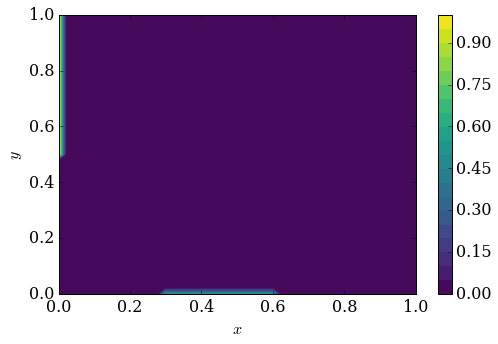

In [101]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,C,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

In [105]:
C_2d = AD_equation_2d(C.copy(), nt, D, u, v, dt, dx, dy)
C_2d

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   8.66177346e-05,   1.98347786e-04, ...,
          5.40283596e-03,   5.22391056e-03,   5.22391056e-03],
       [  0.00000000e+00,   1.86620910e-04,   4.26827255e-04, ...,
          1.17757625e-02,   1.13906721e-02,   1.13906721e-02],
       ..., 
       [  1.00000000e+00,   9.92277381e-01,   9.83080449e-01, ...,
          2.73018924e-01,   2.71456619e-01,   2.71456619e-01],
       [  1.00000000e+00,   9.92467396e-01,   9.83493912e-01, ...,
          2.74209882e-01,   2.72625458e-01,   2.72625458e-01],
       [  1.00000000e+00,   9.92467396e-01,   9.83493912e-01, ...,
          2.74209882e-01,   2.72625458e-01,   2.72625458e-01]])

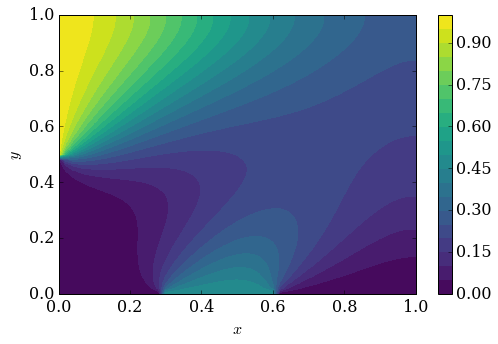

In [103]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,C_2d,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

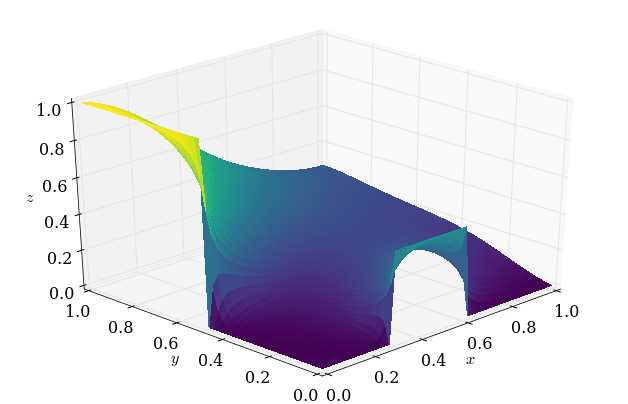

In [104]:
plot_3D(x,y,C_2d)